# **Music Prediction (APTCODER Task)**
Submitted by Tithi Hunka(8860078940)

---
# **Table of Contents**
---

1. [**Introduction and Problem Statement**](#Section1)<br>
2. [**Installing & Importing Libraries**](#Section3)<br>
3. [**Data Description**](#Section4)<br>
4. [**Data Acquisition**](#Section4)<br>
5. [**Data information and description**](#Section4)<br>
6. [**Data Pre-Profiling**](#Section5)<br>
7. [**Data Pre-Processing**](#Section6)<br>
8. [**Exploratory Data Analysis**](#Section8)<br>
9. [**Post processing**](#Section9)</br>
10.[**10.Model development and evalution**](#Section10)</br>


---
<a name = Section1></a>
# **1. Introduction and problem statement**

For a given dataset of people with gender, age and genre of music that they prefer to listen to, You have to train a ML model, so that for a new person with a specific age and gender, your model will be able to predict what genre of music he/she will most likely prefer.
The dataset is shared in the csv format.
0 represents female and 1 represents male.

### Project Deliverable
   - Deliverable:**Music prediction.**
   - Machine Learning Task: **Classification**
   - Target Variable: **genre**
   - Win Condition: N/A (best possible model)

# **2. Installing & Importing Libraries**
---
- This section is emphasised on installing and importing the necessary libraries that will be required.

In [31]:
!pip install -q datascience                                         
# Package that is required by pandas profiling
!pip install -q pandas-profiling                                    
# Library to generate basic statistics about data
!pip install -q --upgrade pandas-profiling                          
# Upgrading pandas profiling to the latest version

In [32]:
pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached MarkupSafe-2.0.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (31 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.


In [33]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing package pandas (For Panel Data Analysis)
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import scipy as sp                                                  # Importing library for scientific calculations
#-------------------------------------------------------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# **3. Data  Description**

- This database was created to predict the music likings trend based on the previous data.
- The column Target is also present in the dataset which is genre.
- Dependent column is "genre" and independent columns are "age", "gender"

---
<a name = Section4></a>
# **4. Data Acquisition**
---

- This section is emphasised on the accquiring the data and obtain some descriptive information out of it.

- You could either scrap the data and then continue, or use a direct source of link (generally preferred in most cases).

- You will be working with a direct source of link to head start your work without worrying about anything.

- Before going further you must have a good idea about the features of the data set:


In [34]:
#Reading CSV file 
import pandas as pd
data = pd.read_csv('/content/music.csv')
data.head()

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz


---
<a name = Section4></a>
# **5. Data information and descriprtion**
---

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     18 non-null     int64 
 1   gender  18 non-null     int64 
 2   genre   18 non-null     object
dtypes: int64(2), object(1)
memory usage: 560.0+ bytes


In [36]:
data.describe()

,age,gender
count,18.000000,18.000000
mean,27.944444,0.500000
std,5.127460,0.514496
min,20.000000,0.000000
25%,25.000000,0.000000
50%,28.000000,0.500000
75%,31.000000,1.000000
max,37.000000,1.000000


---
<a name = Section5></a>
# **6. Data Pre-Profiling**
---

- This section is emphasised on getting a report about the data.

- You need to perform pandas profiling and get some observations out of it...

In [37]:
pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
import sweetviz as sv
data_music = sv.analyze(data)
data_music.show_html('data_music.html') 

                                             |          | [  0%]   00:00 -> (? left)

Report data_music.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [39]:
data.head(5)

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz


---
<a name = Section6></a>
# **7. Data Pre-Processing**
---

- This section is emphasised on performing data manipulation over unstructured data for further processing and analysis.

- To modify unstructured data to strucuted data you need to verify and manipulate the integrity of the data by:
  - Handling/Checking Duplicate Data

  - Handling missing data,

  - Handling redundant data,

  - Handling inconsistent data,

  - Handling outliers,

  - Handling typos


In [40]:
data.duplicated().sum() # No duplicate data

0

In [41]:
data.shape  #18 rows and 3 columns

(18, 3)

In [42]:
data.isna().sum() # No missing values

age       0
gender    0
genre     0
dtype: int64

 ## Observations
 - dataset is having very less records 18 only

 - 3 columns are their

 - Classification kind of problem it is

 - No outlier

 - No null value

 - No duplicate data


---
<a name = Section6></a>
# **8. Exploratory data analysis**
---

## 8.1 distribution of target variable

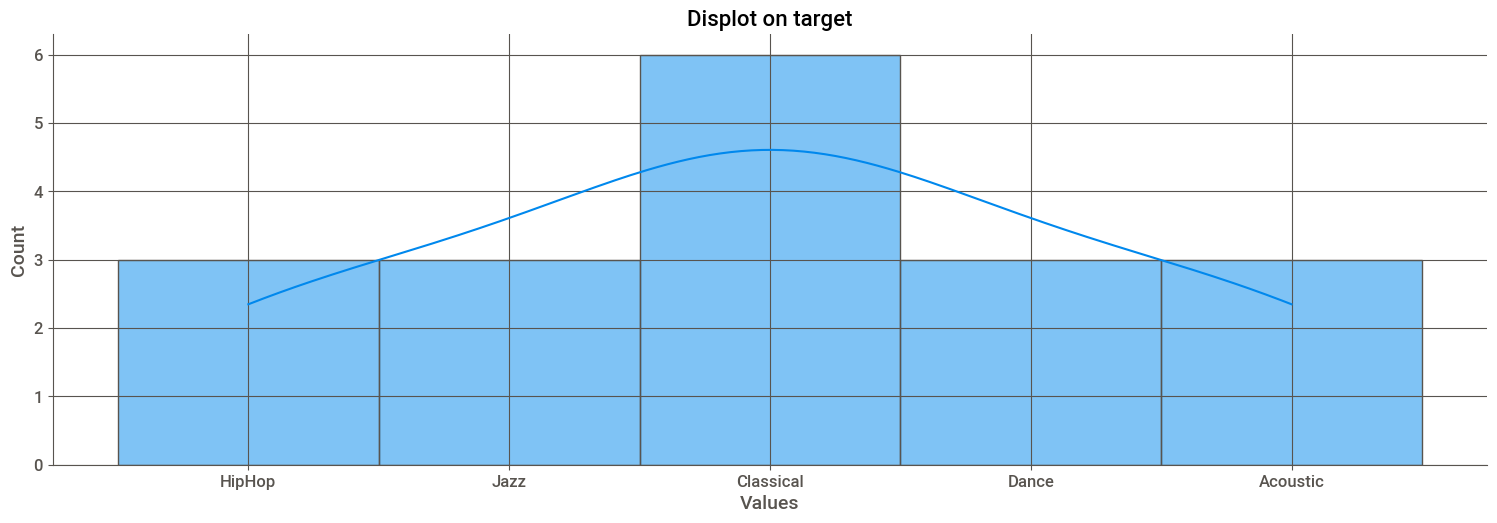

In [43]:
# Plot a displot on target variable
data_sns = data
sns.displot(x='genre', data=data_sns, kde=True, aspect=3)

# Add some cosmetics
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel(xlabel='Values', size=14)
plt.ylabel(ylabel='Count', size=14)
plt.title(label='Displot on target', size=16)
plt.grid(b=True)

# Display the plot
plt.show()

##8.2 distribution of Age column

20    2
25    2
26    2
30    2
31    2
23    1
29    1
33    1
37    1
21    1
27    1
34    1
35    1
dtype: int64


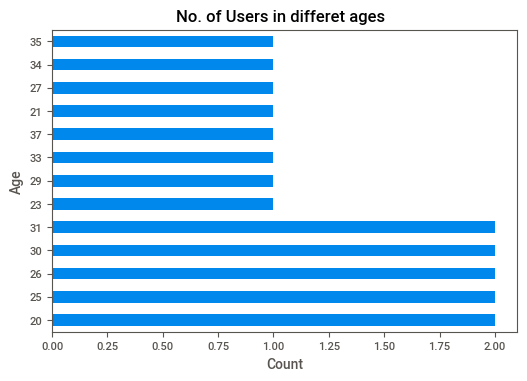

In [44]:
Agedist = pd.value_counts(data['age'].values, sort=True)
print(Agedist)
plt.ylabel("Age")
plt.xlabel("Count")
plt.title("No. of Users in differet ages  ")
Agedist.plot.barh()

##8.3 distribution of gender

Text(0.5, 1.0, 'Male Female Ratio')

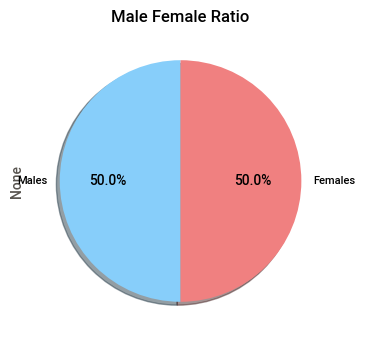

In [45]:
Countgender = pd.value_counts(data['gender'].values, sort=True)
mylabels=['Males','Females']
colors=[ 'lightskyblue','lightcoral']
Countgender.plot.pie(labels=mylabels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Male Female Ratio")

##8.4 pair plot

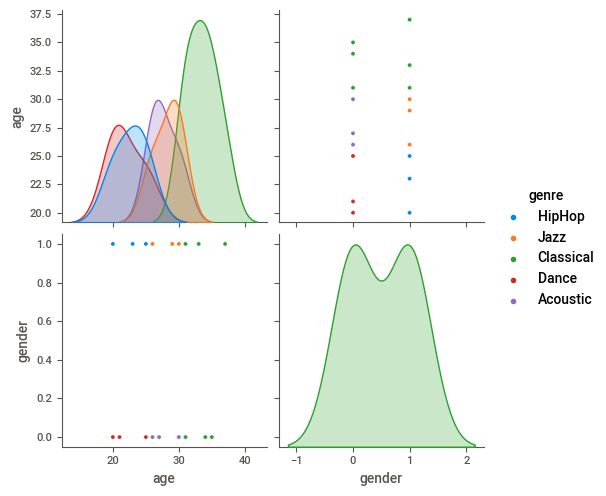

In [46]:
sns.pairplot(data,hue='genre')

 ## Observations
 - Target column(genre) distribution is normal

 - Highest count for age is 31,30,26,25,20 which is 2 for all ages

 - male female ration is 50:50

---
<a name = Section6></a>
# **9. Data post-procesing**
---

In [47]:
y = data[["genre"]]
y.head()

,genre
0,HipHop
1,HipHop
2,HipHop
3,Jazz
4,Jazz


In [48]:
x= data.drop('genre', axis = 1)
x.head()

,age,gender
0,20,1
1,23,1
2,25,1
3,26,1
4,29,1


##One hot encoding is not required as gender is in form of 0 and 1 

In [49]:
# Importing StandardScaler function
from sklearn.preprocessing import StandardScaler

# Instantiating a standard scaler object
scaler = StandardScaler()

# Transforming our data
scaled_arr = scaler.fit_transform(x)

# Inputting our transformed data in a dataframe
scaled_frame = pd.DataFrame(data=scaled_arr, columns=x.columns)

# Getting a glimpse of transformed data
scaled_frame.head()
scaled_frame.describe()

,age,gender
count,1.800000e+01,18.000000
mean,3.083953e-16,0.000000
std,1.028992e+00,1.028992
min,-1.594311e+00,-1.000000
25%,-5.908984e-01,-1.000000
50%,1.114903e-02,0.000000
75%,6.131965e-01,1.000000
max,1.817291e+00,1.000000


In [50]:
from sklearn.model_selection import train_test_split

In [51]:
# Splitting data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

# Display the shape of training and testing data
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (14, 2)
y_train shape:  (14, 1)
x_test shape:  (4, 2)
y_test shape:  (4, 1)


---
<a name = Section6></a>
# **10.Model development and evalution**
---

In [52]:
from sklearn.ensemble import RandomForestClassifier                  # To create a random forest regressor model
from sklearn.linear_model import LogisticRegression                   # To create a linear regression model
from sklearn import metrics                                         # Importing to evaluate the model used for regression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB                          
from xgboost import XGBClassifier

In [53]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import time                                                         # For time functionality

In [57]:
clfs = [LogisticRegression(solver='liblinear'),DecisionTreeClassifier(random_state = 0), RandomForestClassifier(n_estimators = 100, random_state = 0, n_jobs = -1)
       ,KNeighborsClassifier(n_neighbors = 6),GaussianNB(), GradientBoostingClassifier(random_state = 0),XGBClassifier(n_estimators=64, random_state=42)]

for clf in clfs:

  # Extracting model name
  model_name = type(clf).__name__

  # Calculate start time
  start_time = time.time()

  # Train the model
  clf.fit(x_train, y_train)


  # Make predictions on the trained model
  predictions = clf.predict(x_test)


  ACCURACY_SCORE = accuracy_score(y_test,predictions)
  CLASSIFICATION_REPORT=classification_report(y_test,predictions)


  # Calculate evaluated time
  elapsed_time = (time.time() - start_time)

  # Display the metrics and time took to develop the model
  print('Performance Metrics of', model_name, ':')
  print('[ACCURACY SCORE]:', ACCURACY_SCORE, '[Processing Time]:', elapsed_time, 'seconds')
  print('[CLASSIFICATION REPORT]:',CLASSIFICATION_REPORT)
  print('----------------------------------------\n')

Performance Metrics of LogisticRegression :
[ACCURACY SCORE]: 0.25 [Processing Time]: 0.015490293502807617 seconds
[CLASSIFICATION REPORT]:               precision    recall  f1-score   support

   Classical       0.25      1.00      0.40         1
      HipHop       0.00      0.00      0.00         2
        Jazz       0.00      0.00      0.00         1

    accuracy                           0.25         4
   macro avg       0.08      0.33      0.13         4
weighted avg       0.06      0.25      0.10         4

----------------------------------------

Performance Metrics of DecisionTreeClassifier :
[ACCURACY SCORE]: 1.0 [Processing Time]: 0.02154707908630371 seconds
[CLASSIFICATION REPORT]:               precision    recall  f1-score   support

   Classical       1.00      1.00      1.00         1
      HipHop       1.00      1.00      1.00         2
        Jazz       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00

## Observations
- DecisionTreeClassifier ,RandomForestClassifier,GradientBoostingClassifier all 3 algorithms are giving best results among all the alogrithms

- Hyper parameter tuning can be applied to the model followed by cross validation techniques

- As the train dataset has less number of records, the dataset can lead to underfitting.